<a href="https://colab.research.google.com/github/FachrezaAl/Damin_KmeansClustering/blob/master/Damin_KMeansClustering_1301164500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

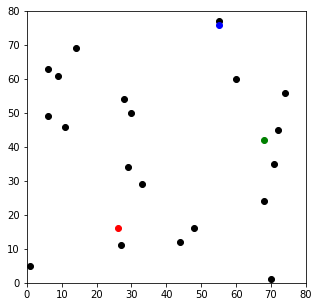

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


jumlahData = 20

def dataRandom():
    x = []
    y = []
    for i in range(jumlahData):
        x.append(np.random.randint(0,80))
        y.append(np.random.randint(0, 80))
    return x,y

x,y = dataRandom()

data = pd.DataFrame({
    'x': x,
    'y': y
})


"""
data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 49, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
"""

np.random.seed(200)
k = 3
# centroids[i] [x,y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
    



    x   y  Distance From 1  ...  Distance from 2  Distance from 3  closet
0  44  12        18.439089  ...        38.418745        64.938432       1
1  72  45        54.378304  ...         5.000000        35.355339       2
2   6  63        51.078371  ...        65.459911        50.695167       3
3   9  61        48.104054  ...        61.983869        48.383882       1
4  14  69        54.341513  ...        60.373835        41.593269       3

[5 rows x 14 columns]


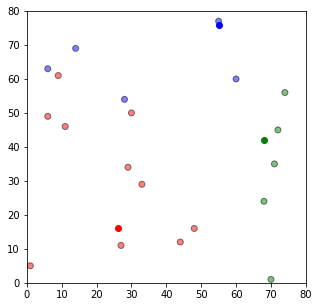

In [25]:
## Assignment stage

def assignment(data, centroids):
    for i in centroids.keys():
        # rumus = sqrt((x1 - x2) - (y1 - y2)^2)
        data['Distance From {}'.format(i)] = (
            np.sqrt(
                (data['x'] - centroids[i][0]) ** 2
                + (data['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_Distance = ['Distance from {}'.format(i) for i in centroids.keys()]
    data['closet'] = data.loc[:, centroid_Distance].idxmin(axis=1)
    data['closet'] = data['closet'].map(lambda x: int(x.lstrip('Distance from')))
    data['color'] = data['closet'].map(lambda x: colmap[x])
    return data

data = assignment(data,centroids)
print(data.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

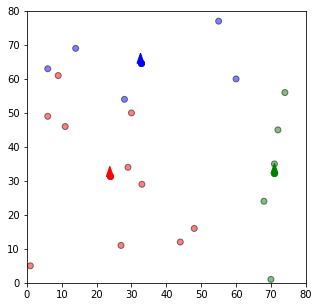

In [28]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closet'] == i]['x'])
        centroids[i][1] = np.mean(data[data['closet'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

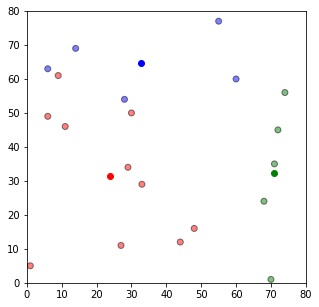

In [29]:
## Repeat ASsignment update

data = assignment(data, centroids)

# hasil
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


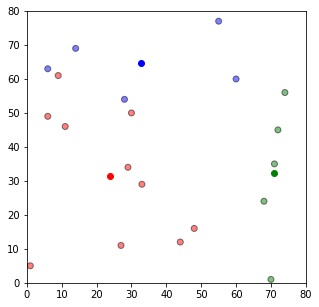

In [30]:
# Mencari nilai

while True:
    closet_centroids = data['closet'].copy(deep=True)
    centroids = update(centroids)
    data = assignment(data,centroids)
    if  closet_centroids.equals(data['closet']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


In [31]:
data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 49, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_